In [45]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


PyCaret is an open-source, low-code machine learning library in Python that simplifies the process of building, 
training, and deploying machine learning models. It is designed to be a productivity tool for data scientists and
 machine learning practitioners by automating many repetitive tasks in the machine learning pipeline.

## Advantages of PyCaret 

__Ease of Use:__

Intuitive syntax makes it accessible to beginners.

__Time-Saving:__

Automates preprocessing, training, and evaluation, reducing the need for manual coding.

__Consistent Results:__

Standardizes workflows, ensuring reproducibility.

__Integration with Notebooks:__

Works seamlessly with Jupyter notebooks, simplifying exploratory data analysis.

## When to Use PyCaret

* Rapid prototyping of machine learning models.
* Quick comparisons between algorithms.
* For data scientists and developers looking to deploy models without diving deep into code.
* When automating repetitive parts of the machine learning workflow.

For advanced users, PyCaret may lack fine-grained control over specific aspects of model tuning and preprocessing, 
but it can still serve as an excellent baseline or learning tool.

In [46]:
import pandas as pd

df = pd.read_csv("updated_data.csv")

print(df.head())

   id  id.1  Gender        Age    Height      Weight  \
0   0     0    Male  24.443010  1.699998   81.669950   
1   1     1  Female  18.000000  1.560000   57.000000   
2   2     2  Female  18.000000  1.711460   50.165752   
3   3     3  Female  20.952738  1.710730  131.274860   
4   4     4    Male  31.641080  1.914186   93.798060   

  family_history_with_overweight frequent_consumption_of_high_caloric_food  \
0                            yes                                       yes   
1                            yes                                       yes   
2                            yes                                       yes   
3                            yes                                       yes   
4                            yes                                       yes   

   frequency_of_consumption_of_vegetables  number_of_main_meals  ...  \
0                                2.000000              2.983297  ...   
1                                2.000000         

In [47]:
# Step 1: Import Libraries
from pycaret.classification import *
import pandas as pd

# Step 3: Initialize Setup
clf1 = setup(data=df, target='obesity_level')

,Description,Value
0,Session id,7835
1,Target,obesity_level
2,Target type,Multiclass
3,Target mapping,"Insufficient_Weight: 0, Normal_Weight: 1, Obesity_Type_I: 2, Obesity_Type_II: 3, Obesity_Type_III: 4, Overweight_Level_I: 5, Overweight_Level_II: 6"
4,Original data shape,"(4999, 27)"
5,Transformed data shape,"(4999, 42)"
6,Transformed train set shape,"(3499, 42)"
7,Transformed test set shape,"(1500, 42)"
8,Numeric features,17
9,Categorical features,9


## pycaret.classification: 

Imports PyCaret's classification module, which contains tools to handle classification 
tasks such as binary and multi-class classification.

## what is multiclass ?

In machine learning, "multiclass" refers to a classification problem where there are more than two 
classes or categories to predict. Unlike binary classification, which deals with only two classes
 (e.g., spam vs. not spam), multiclass classification involves predicting one class out of three or
   more possible classes.

For example, if you have a dataset of animals and you want to classify each animal as either a cat, dog,
 or rabbit, this would be a multiclass classification problem. Some common algorithms used for multiclass 
 classification include:

__Decision Trees:__ These can handle multiple classes naturally.

__Random Forests:__ An ensemble method that can also handle multiple classes.

__Support Vector Machines (SVM):__ With modifications, SVMs can be used for multiclass classification.

__Neural Networks:__ These are particularly powerful for complex multiclass problems.

__Logistic Regression:__ With extensions like softmax regression, it can handle multiple classes.

Multiclass classification is widely used in various applications, such as image recognition, text classification, 
and medical diagnosis. If you have a specific context or dataset in mind, I can provide more tailored information!

## pandas: 
Used for handling the dataset (df), allowing loading, manipulation, and exploration of tabular data.

__clf1 = setup(data=df, target='obesity_level')__

__setup():__

* The setup function initializes the PyCaret environment for classification. It handles tasks like:
Splitting the data into training and testing sets.
* Preprocessing the dataset (e.g., encoding categorical variables, handling missing values).
Normalizing or scaling numerical data if required.
* Generating feature interactions and polynomial features (if enabled).
__Parameters:__

__data:__ The input dataset (df), assumed to be a Pandas DataFrame.
__target:__ The name of the column containing the target variable (obesity_level), which PyCaret will try to predict.
__Output:__

Returns a session ID (clf1) that contains the configuration of the ML experiment.
User Interaction:

When run in an interactive environment like Jupyter Notebook, setup() will display a grid summarizing the preprocessing steps applied to the data and the type of ML task (classification in this case).

| **Description**  | **value**            | **Explanation and Observations**                     |
| :----------- | :--------------: | :-------------------------: |
| Session ID   | 800              | New session ID for this run. Ensures reproducibility if the same configuration is reused. |
| Target	| obesity_level |	The target column remains unchanged. |
| Target Type |	Multiclass |	Classification problem with multiple classes.
| Target Mapping |	Insufficient_Weight: 0, ... |	Same mapping of target classes to numerical values. |
| Original Data Shape |	(4999, 18) |	One column fewer than in the previous setup. This may indicate the removal of an unnecessary column or feature during preprocessing or data cleaning. |
| Transformed Data Shape |	(4999, 27) |	Resulting number of features after transformations is 27, reduced from 28 in the earlier setup. This aligns with the removal of a column in the input data. |
| Transformed Train Set |	(3499, 27) |	No changes in the train-test split ratio (still ~70:30). |
| Numeric Features |	9 |	One numeric feature fewer than before, likely due to the dropped column.|
| Categorical Features |	8	| The number of categorical features remains the same.|
| Preprocess |	True |	Preprocessing remains enabled.|
| Imputation Type	|simple |	Simple imputation is still used for missing data.
| Numeric Imputation |	mean |	Mean imputation applied to numeric columns with missing values.|
| Categorical Imputation |	mode |	Mode imputation applied to categorical columns with missing values. |
| Maximum One-Hot Encoding |	25 |	PyCaret will apply one-hot encoding if a categorical column has fewer than 25 unique values. |
| Encoding Method |	None |	No alternative encoding method is specified.|
| Fold Generator |	StratifiedKFold	Same | cross-validation technique used. |
| Fold Number |	10 |	Still using 10 folds for cross-validation. |
| CPU Jobs |	-1 |	All available CPU cores are being utilized. |
| Use GPU |	False |	GPU acceleration is not enabled. |
| Log Experiment |	False |	Experiment logging is not activated. |
| Experiment Name |	clf-default-name |	The default experiment name is retained. |
| USI |	a243 |	Unique Session Identifier for this particular PyCaret run. |

# Session ID
The Session ID in PyCaret is a randomly generated or user-defined integer that ensures reproducibility of results in your machine learning pipeline. It acts like a "seed" for random number generation.

__Why is Session ID Important?__

__1. Random Processes:__ Machine learning involves several random processes, such as:

* Splitting the data into training and testing sets.
* Shuffling the data during cross-validation.
* Random initialization of model weights (for certain algorithms). Setting a Session ID ensures these processes are consistent across runs.

__2. Reproducibility:__ By using the same Session ID, you can:

* Recreate the exact same results even if you rerun the code multiple times.
* Share your work with others and allow them to reproduce your results.

__How Does it Work?__

PyCaret uses the Session ID as the seed value for any random number generator used in the pipeline.
For example:
``` python
from pycaret.classification import *
# First run
clf1 = setup(data=df, target='obesity_level', session_id=123)
# Second run with the same session_id
clf2 = setup(data=df, target='obesity_level', session_id=123)
```
Both clf1 and clf2 will produce identical results (e.g., same train-test split, cross-validation scores, etc.).

**Can You Change it?**

Yes, you can set your own Session ID during the setup() step:

```python
clf = setup(data=df, target='obesity_level', session_id=42)
```
If you don’t specify a Session ID, PyCaret generates one randomly (as seen in your output: Session ID = 880).

**When to Use It?**

* When debugging or tuning models, to ensure results don’t change between runs.
* When sharing your work, to provide a consistent baseline for others to validate.

**how (4999, 18) becomes (4999, 27) ?**

__Reasons for the Increase__
1. __One-Hot Encoding of Categorical Variables:__

* PyCaret converts categorical variables into numeric representations using one-hot encoding if preprocessing is enabled.
* In one-hot encoding:
* Each unique category in a categorical column is represented as a separate binary column (0 or 1).

For example:
```text
Column: transportation_used = ["Car", "Bike", "Public_Transport"]
Transforms to:
transportation_used_Car, transportation_used_Bike, transportation_used_Public_
```
If your dataset has many categorical variables with multiple unique categories, this can significantly increase the column count.

__Handling Missing Values:__

* Categorical columns with missing values might generate an additional column for "missing" as part of imputation strategies.

For example:
```text
original: Gender = ["Male", "Female", NaN]
transformed: Gender_Male, Gender_Female, Gender_missing
```
**In Your Case**
- Original Data Shape: (4999, 18):
* 18 columns in the original dataset (likely a mix of numeric and categorical data).
- Transformed Data Shape: (4999, 27):
* After one-hot encoding, categorical columns expanded, resulting in 27 total features.

**Example Explanation**

Let’s assume your original data includes:

9 numeric features.

8 categorical features, with the following unique values:

Gender: 2 (e.g., Male, Female)

Transportation_Used: 4 (e.g., Car, Bike, Public_Transport, Walking)

(Other 6 categorical variables with multiple categories)

One-hot encoding expands the categorical columns:

```text
Gender --> 2 columns (Male, Female)
Transportation_Used --> 4 columns (Car, Bike, Public_Transport, Walking)
```
The total columns after transformation will equal the numeric features plus the one-hot-encoded columns.


# **Transformed Train Set**`(3499, 27)`No changes in the train-test split ratio (still ~70:30). ?

The statement refers to how PyCaret splits your dataset into training and testing subsets during the machine learning setup process.

* Breakdown of (3499, 27)
* 3499: The number of rows in the training set, which is ~70% of the total rows (4999).
* 27: The number of columns (features) in the transformed dataset after preprocessing.

**How Does PyCaret Split the Data?**

By default, PyCaret splits the dataset into:

* Training set (default: 70%): Used to train the machine learning models.
* Testing set (default: 30%): Used to evaluate the models on unseen data.

If your total dataset has 4999 rows:

* Training set size: 70%×4999=3499 rows.
* Testing set size:  30%×4999=1500 rows.

This ensures that the model is trained on a larger portion of the data while leaving enough data to evaluate its performance.

**Why is this Important?**

Train-Test Split Ratio:

* The 70:30 ratio is commonly used because it balances the need for sufficient training data and enough testing data to evaluate the model's performance reliably.
* PyCaret uses StratifiedKFold (if the target is categorical) to ensure the class distribution in the target column remains consistent across the train and test sets.

# What is one-hot encoding ?

One-hot encoding is a way to convert categorical variables (non-numeric data like "Male" or "Female") into numeric form so machine learning models can understand it.

Example
Imagine you have a small dataset like this:

| **Person** |	**Gender**  |	**Transportation** |
|------------|:--------------:|:--------------------:|
| 1 |	Male | Car |
| 2	| Female | Bike |
| 3 |	Female | Public Transport |
| 4	|Male |	Walking |

**Step 1: Identify the Categorical Columns**

The columns Gender and Transportation are categorical because they have non-numeric data.

**Step 2: Perform One-Hot Encoding**

We create new columns for each unique value in these categorical columns:

1. For Gender: There are 2 unique values (Male and Female).
2. For Transportation: There are 4 unique values (Car, Bike, Public Transport, and Walking).

**Step 3: Replace with Binary Columns**

Now, each unique value gets its own column with 0s and 1s to indicate the value:

|Person |	Gender_Male |	Gender_Female |	Transportation_Car |	Transportation_Bike |Transportation_Public_Transport|Transportation_Walking|
|-------|-------------|---------------|--------------------|---------------------|--------------------------------|----------------------|
|1	|1|	0|	1|	0|	0|	0|
|2|	0|1|	0|	1|	0|	0|
|3|	0|	1|	0|	0|	1|	0|
|4|	1|	0|	0|	0|	0|	1|

# Why Use One-Hot Encoding?
* Numeric Format: Machine learning models cannot directly use non-numeric data like "Male" or "Car." Encoding makes it numeric.
* Preserves Information: Each category is represented without assigning arbitrary values (e.g., not giving "Male" = 1 and "Female" = 2, which could introduce bias).

# Key Observations
**Number of New Columns:**

* Original Gender column becomes 2 columns: `Gender_Male`,` Gender_Female`.
* Original Transportation column becomes 4 columns: `Transportation_Car`, `Transportation_Bike`, etc.

**Increased Total Columns:**

* If your original dataset had 2 numeric columns and 2 categorical columns (e.g., Age, Height, Gender, and Transportation), the total columns increase after encoding.
* Example: Original: 4 columns → Encoded: 7 columns (2 from Gender, 4 from Transportation, and 1 numeric Age).

# what is Preprocess = True ?

In PyCaret, `Preprocess` refers to the automatic data preparation and transformation that is applied to your dataset during the setup step. This process ensures the data is ready for machine learning models by handling common issues like missing values, categorical data, and scaling.

__Key Tasks in Preprocessing__

1. Handling Missing Values:

* __Numeric columns:__ Missing values are filled with the column's mean (default strategy).
* __Categorical columns:__ Missing values are filled with the most frequent value (mode).

2. Encoding Categorical Variables:

   * Converts non-numeric data (e.g., "Male", "Female") into numeric representations using one-hot encoding or other encoding methods.

3. Scaling and Normalization:

   * Transforms numeric features to a standard range or distribution (like 0–1 or standard normal distribution) to help algorithms perform better.

4. Train-Test Split:

    * Splits the dataset into training and testing subsets. By default, 70% of the data is used for training, and 30% is reserved for testing.

5. Feature Engineering (Optional):

    * Can automatically generate new features based on interactions, polynomial terms, or date-time features.

6. Removing Duplicates or Empty Rows:

   * Cleans the dataset by removing unnecessary rows.

# Preprocessing in our Case
__From your PyCaret setup output:__

* `Preprocess: True` indicates PyCaret applied preprocessing steps like:

__Imputation:__
 * Numeric missing values → Filled with the column mean.
 * Categorical missing values → Filled with the mode.

__One-Hot Encoding:__

 * Categorical variables were converted to binary columns, which increased the dataset size from 18 columns to 27 columns.

__Scaling/Normalization:__

 * Numeric data was scaled for better model performance.

# What Happens If Preprocess=False?
If you set `Preprocess=False` in the setup() function, PyCaret will skip all automatic preprocessing.

You must manually handle:

* Missing values.
* Encoding categorical data.
* Scaling numeric features.

Preprocessing is a critical step to ensure your data is clean and ready for modeling, making it an essential feature of PyCaret!

# Imputation Type

In PyCaret, Imputation Type refers to how missing values in your dataset are handled during preprocessing.

__What is Imputation Type?__
Imputation is the process of replacing missing data with substitute values so that the dataset can be used for machine learning. Without imputation, rows or columns with missing values might lead to errors or poor model performance.

__Types of Imputation in PyCaret__

Numeric Imputation:

* PyCaret replaces missing values in numeric columns with the mean of the column (default).

Example:

```text
Age: [25, NaN, 30, NaN, 35]
Imputed Age: [25, 30, 30, 30, 35]  # Mean is 30
```
__Categorical Imputation:__

 * PyCaret replaces missing values in categorical columns with the mode (most frequent value) of the column (default).
Example:
```text
Gender: ["Male", NaN, "Female", NaN, "Male"]
Imputed Gender: ["Male", "Male", "Female", "Male", "Male"]  # Mode is "Male"
```
__Advanced Imputation (Custom):__

If needed, you can specify custom imputation strategies (e.g., median for numeric values or a placeholder like "unknown" for categorical data).

# Why Does PyCaret Use Simple Imputation?

**Default Imputation Type: Simple**

* Numeric: Mean
* Categorical: Mode
* Simple imputation is computationally efficient and often sufficient for many datasets.
* For more advanced datasets, you can customize this during preprocessing or modify the dataset before feeding it into PyCaret.

__How to Modify Imputation?__

You can change how missing values are handled before using PyCaret or by preprocessing your dataset manually:

```python
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')  # Change strategy to median
df['Age'] = imputer.fit_transform(df[['Age']])
```

Alternatively, you can preprocess outside PyCaret if you need a different strategy.

In PyCaret, Imputation Type refers to the method used to handle missing values in your dataset during preprocessing. PyCaret automatically detects missing values and fills (or imputes) them based on the type of the feature (numeric or categorical).


# Encoding Method None No alternative encoding method is specified.

In PyCaret, when you see Encoding Method: None, it means that PyCaret has not applied any additional encoding techniques beyond the default one-hot encoding (if preprocessing is enabled). Let's break it down for clarity:

# What If Another Encoding Method Were Used?

If you explicitly specify an encoding method during setup (e.g., ordinal, label, or target encoding), PyCaret would apply it instead of one-hot encoding. For example:

```python
clf = setup(data=df, target='obesity_level', categorical_features=['Gender'], encoding_method='label')
```
In this case:

Label encoding might map Gender as:

Male → 0

Female → 1

# Fold Generator `StratifiedKFold` Same  cross-validation technique used.

Fold Generator: StratifiedKFold refers to the type of cross-validation technique PyCaret uses to evaluate machine learning models during the setup process.

**What is Cross-Validation?**

Cross-validation is a technique used to assess the performance of machine learning models. It involves splitting the dataset into `training` and `validation` subsets multiple times, allowing the model to train and validate on different splits of data. This helps estimate how well the model generalizes to unseen data.

StratifiedKFold is a technique used in machine learning to split data into different parts (called "folds") for training and testing models. The key feature of StratifiedKFold is that it ensures each fold has the same proportion of different classes (categories) as the original dataset. This is especially useful when you have imbalanced data, meaning some classes are much more frequent than others.

Here's a simple example:

Imagine you have a dataset of 100 fruits, with 80 apples and 20 oranges. If you want to split this data into 5 folds, you want each fold to have the same ratio of apples to oranges as the original dataset (80% apples and 20% oranges).

Using StratifiedKFold, each fold would look something like this:

Fold 1: 16 apples, 4 oranges

Fold 2: 16 apples, 4 oranges

Fold 3: 16 apples, 4 oranges

Fold 4: 16 apples, 4 oranges

Fold 5: 16 apples, 4 oranges

This way, when you train and test your model on each fold, it gets a balanced view of the data, which helps improve the model's performance and reliability.

# CPU Jobs (-1)
 * __Meaning:__ This indicates the number of CPU cores PyCaret will use.
 * __Value -1:__ It means PyCaret will utilize all available CPU cores on your system for parallel processing.
 * __Why?__ Using multiple cores speeds up operations like model training and cross-validation.

# Use GPU (False)
 * **Meaning:** This shows whether GPU acceleration is enabled.
 * **Value False:** PyCaret is not using a GPU for computations.
 * **Why?** GPU acceleration is typically used for deep learning frameworks (e.g., TensorFlow, PyTorch). PyCaret's default classifiers don't require GPUs unless explicitly integrated with libraries like XGBoost or LightGBM with GPU support.

# Log Experiment (False)
 * **Meaning:** This indicates whether experiment logging is activated.
 * **Value False:** Logging is not enabled, so the session details, metrics, and results are not being saved to a tracking system like MLflow.
 * **Why?** A log experiment typically refers to the process of recording and analyzing data in a systematic way during scientific research or testing. This can involve keeping a detailed logbook or using software to track various parameters and results over time. The goal is to ensure accurate, reproducible, and transparent documentation of the experimental process.

# Experiment Name (clf-default-name)
 * **Meaning:** This is the name given to the experiment for tracking purposes.
 * **Value clf-default-name:** PyCaret is using a default experiment name since logging is disabled. If you enable logging, you can specify a custom name to identify the session.

# USI (Unique Session Identifier) (a243)
 * **Meaning:** This is a unique identifier for the PyCaret session.
 * **Value a243:** A randomly generated session ID to distinguish this run from others.
 * **Why?** Useful for reproducibility and session tracking when working with multiple experiments.

In [48]:

clf1 = setup(data=df, target='obesity_level',numeric_features=['Age', 'Weight', 'Height'])

,Description,Value
0,Session id,3467
1,Target,obesity_level
2,Target type,Multiclass
3,Target mapping,"Insufficient_Weight: 0, Normal_Weight: 1, Obesity_Type_I: 2, Obesity_Type_II: 3, Obesity_Type_III: 4, Overweight_Level_I: 5, Overweight_Level_II: 6"
4,Original data shape,"(4999, 27)"
5,Transformed data shape,"(4999, 42)"
6,Transformed train set shape,"(3499, 42)"
7,Transformed test set shape,"(1500, 42)"
8,Numeric features,3
9,Categorical features,9


1. `setup(data=df, target='obesity_level')`
 * Initializes a PyCaret classification setup for the dataset df.
**Target:**
 * The column named 'obesity_level' is the target (dependent) variable that the machine learning models will try to predict.
**Data:**
 *  The df DataFrame contains all the features (independent variables) and the target column.
2. `numeric_features=['Age', 'Weight', 'Height']`
 * By specifying numeric_features, you are explicitly declaring these columns (Age, Weight, Height) as numeric features.
 * This ensures PyCaret treats these columns as numerical data, even if their data types in the DataFrame are ambiguous or incorrectly interpreted.

# Why Declare numeric_features?
 **PyCaret attempts to infer the type of each column automatically. However:**

 * If a numeric column contains unexpected values (e.g., NaN or strings like 'unknown'), PyCaret might misinterpret it as categorical.
 * By specifying numeric_features, you're overriding this automatic inference to prevent errors.

# Why Use This?
 * This customization ensures PyCaret correctly processes the numeric data, avoiding errors during preprocessing and enabling better model training.

In [49]:
clf1 = setup(data=df, target='obesity_level', categorical_features=['consumption_of_food_between_meals', 'family_history_with_overweight'])

,Description,Value
0,Session id,4262
1,Target,obesity_level
2,Target type,Multiclass
3,Target mapping,"Insufficient_Weight: 0, Normal_Weight: 1, Obesity_Type_I: 2, Obesity_Type_II: 3, Obesity_Type_III: 4, Overweight_Level_I: 5, Overweight_Level_II: 6"
4,Original data shape,"(4999, 27)"
5,Transformed data shape,"(4999, 30)"
6,Transformed train set shape,"(3499, 30)"
7,Transformed test set shape,"(1500, 30)"
8,Numeric features,17
9,Categorical features,2


,Description,Value
0,Session id,7655
1,Target,obesity_level
2,Target type,Multiclass
3,Target mapping,"Insufficient_Weight: 0, Normal_Weight: 1, Obesity_Type_I: 2, Obesity_Type_II: 3, Obesity_Type_III: 4, Overweight_Level_I: 5, Overweight_Level_II: 6"
4,Original data shape,"(4999, 27)"
5,Transformed data shape,"(4999, 42)"
6,Transformed train set shape,"(3499, 42)"
7,Transformed test set shape,"(1500, 42)"
8,Numeric features,17
9,Categorical features,9


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,0.0000,0.9000,0.9025,0.8992,0.8827,0.8833
1,0.9029,0.0000,0.9029,0.9072,0.9036,0.8862,0.8866
2,0.7914,0.0000,0.7914,0.7969,0.7813,0.7545,0.7580
3,0.8257,0.0000,0.8257,0.8285,0.8218,0.7954,0.7970
4,0.8514,0.0000,0.8514,0.8488,0.8472,0.8255,0.8265
5,0.8714,0.0000,0.8714,0.8712,0.8699,0.8491,0.8497
6,0.8771,0.0000,0.8771,0.8808,0.8771,0.8560,0.8566
7,0.9343,0.0000,0.9343,0.9339,0.9336,0.9230,0.9231
8,0.8286,0.0000,0.8286,0.8331,0.8284,0.7994,0.8003


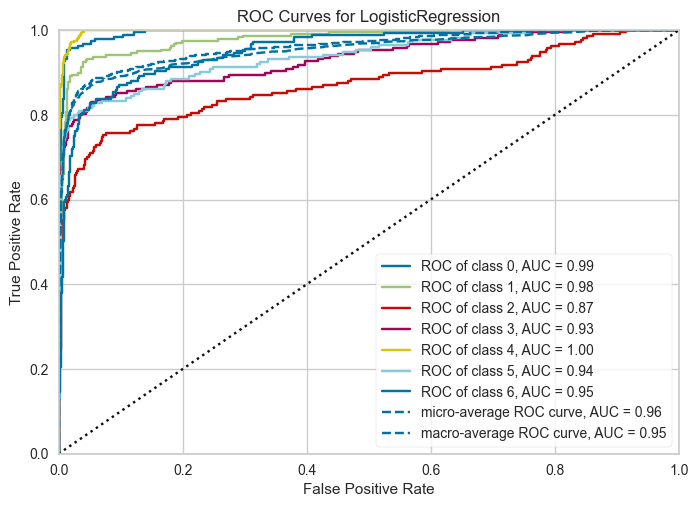

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8472,0.9546,0.8472,0.8458,0.8447,0.8206,0.8212


Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8472,0.9546,0.8472,0.8458,0.8447,0.8206,0.8212


"\nWhat's Next?\n\nYou can experiment with other models (create_model('rf') for Random Forest, for instance).\nEvaluate performance across multiple models using compare_models().\n"

In [50]:
# Step 1: Import Libraries
from pycaret.classification import *
import pandas as pd

# Step 2: Load Data
df = pd.read_csv('updated_data.csv')

# Step 3: Initialize Setup
clf1 = setup(data=df, target='obesity_level')
'''
Initializes PyCaret’s classification setup for automating preprocessing and model training.
Parameters:
data: The DataFrame containing features and target variable.
target: The column PyCaret will predict (obesity_level in this case).
What happens internally?

PyCaret preprocesses the data:
Handles missing values.
Converts categorical data to numeric using encoding.
Normalizes or scales numeric data if needed.
Splits the data into training and test sets.
'''

# Step 4: Create and Train a Model
model = create_model('lr')  # 'lr' stands for Logistic Regression
'''
Builds a Logistic Regression model.
PyCaret automatically:
Trains the model on the training set.
Evaluates it on the test set.
Other model codes: Use 'rf' for Random Forest, 'dt' for Decision Tree, etc.

'''

# Step 5: Evaluate the Model
plot_model(model)  # Plot various evaluation metrics

'''
Generates visualizations for model performance.
Common plots:
Confusion Matrix: Shows predictions vs. actual classes.
ROC Curve: Evaluates classification performance.
Feature Importance: Highlights important features for the model.
'''

# Step 6: Make Predictions on the Same Data (or you can split your data for real unseen predictions)
predictions = predict_model(model, data=df)
'''
Uses the trained model to predict labels for the same dataset.
Adds a Label column (predicted class) and a Score column (probability) to the output.
'''

# Step 7: Save the Model
save_model(model, 'my_model')
'''
Saves the trained model to a file named 'my_model.pkl'.
'''
# Step 8: Load the Model
loaded_model = load_model('my_model')
'''
Loads the previously saved model from 'my_model.pkl'.
'''

# Step 9: Make New Predictions
new_predictions = predict_model(loaded_model, data=df)
'''
Predicts on the dataset again using the loaded model.
Useful for ensuring reproducibility or making predictions on new data.
'''

'''
What's Next?

You can experiment with other models (create_model('rf') for Random Forest, for instance).
Evaluate performance across multiple models using compare_models().
'''

# Logistic regression
Logistic regression is a type of statistical model used to predict the probability of a certain event occurring. It's particularly useful when the outcome is binary, meaning it has two possible outcomes, like "yes" or "no," "success" or "failure."

**Simple Explanation**
Imagine you're trying to predict whether it will rain tomorrow. You have data on past weather conditions, like temperature, humidity, and wind speed. Logistic regression helps you use this data to estimate the probability of rain.

__Example__
Let's say you have a dataset with information about students' study hours and whether they passed an exam (Pass = 1, Fail = 0). Logistic regression can help you predict the probability of a student passing based on their study hours.

Here's a simplified example:

Data:

Study Hours: [2, 3, 5, 7, 8]

Pass (1) or Fail (0): [0, 0, 1, 1, 1]

Model: Logistic regression will analyze this data and find a relationship between study hours and the probability of passing.

Prediction: If a new student studies for 6 hours, the model might predict a 70% chance of passing.

In essence, logistic regression helps you make informed guesses about outcomes based on input data. It's widely used in fields like medicine, finance, and social sciences to make predictions and decisions.


# Simple Dataset Example:

Imagine you have the following data to predict whether a person is obese:

|Person	| Height (cm)|	Weight (kg)|	Obesity Level (Target)|
|--------|------------|-------------| --------------------------|
|1 |	180 |75|	Normal_Weight|
|2 |	150 |	90 |	Obesity_Type_I|
|3 |	160	|100 |	Obesity_Type_II|
|4 |	170	| 60 |	Normal_Weight| 
|5 |	140 |	110 |	Obesity_Type_III| 
|6 |	175 |	80 |	Overweight_Level_I|
|7 |	165 |	95 |	Obesity_Type_I|
|8 |	155 |	105 |	Obesity_Type_II|
|9 |	190 |	85 |	Overweight_Level_I|
|10 |	145 |	115 |	Obesity_Type_III|

__Goal:__ Use height and weight to predict "Obesity Level".

__What is a Fold?__

In k-fold cross-validation, the data is split into k parts (folds). One fold is used as the test set, and the remaining folds are used as the training set. This process repeats k times, so every fold gets a chance to be the test set. Finally, the results are averaged to give a more reliable performance measure.

Example of 2-Fold Cross-Validation:

Split the data into 2 folds:

Fold 1 (Test Set): Rows 1-5

Fold 2 (Traning Set): Rows 6-10

Remaining rows in each case become the training set.
Train the model on the training set and test it on the test set. Repeat for both folds.

__Step-by-Step Example:__

Step 1: Split Data

For simplicity, let’s use 2 folds:

| Fold 1 (Training Set) | | Fold 1 (Test Set) | |---------------------------| |-----------------------| | Person 6-10 | | Person 1-5 |

| Fold 2 (Training Set) | | Fold 2 (Test Set) | |---------------------------| |-----------------------| | Person 1-5 | | Person 6-10 |


Step 2: Train and Test the Model
Let’s use a simple rule-based model:

 * If weight > 85 kg, predict Obesity.
 * Else, predict Normal_Weight.

__Fold 1 Results:__
 * Training Data: Rows 6-10.
 * Test Data: Rows 1-5.

|Person |	Actual Obesity Level |	Predicted Obesity Level |
|:-------:|:------------:|:----------------:|
|1 |	Normal_Weight |	Normal_Weight ✅|
|2|	Obesity_Type_I |	Obesity_Type_I ✅ |
|3|	Obesity_Type_II |Obesity_Type_I ❌|
|4|	Normal_Weight |	Normal_Weight ✅|
|5|	Obesity_Type_III|	Obesity_Type_I ❌|

Accuracy = Correct Predictions / Total = 3/5 = 60%.

__Fold 2 Results:__
Training Data: Rows 1-5.
Test Data: Rows 6-10.

|Person	|Actual Obesity Level	|Predicted Obesity Level|
|-------|------------|---------------|
|6|	Overweight_Level_I	|Obesity_Type_I ❌|
|7|	Obesity_Type_I	|Obesity_Type_I ✅|
|8|	Obesity_Type_II|	Obesity_Type_I ❌|
|9	|Overweight_Level_I|	Normal_Weight ❌|
|10|	Obesity_Type_III	|Obesity_Type_I ❌|

Accuracy = Correct Predictions / Total = 1/5 = 20%.

Step 3: Average Metrics Across Folds

Fold 1 Accuracy: 60%.

Fold 2 Accuracy: 20%.

Mean Accuracy = (60% + 20%) / 2 = 40%.

__Explain the Metrics in Simple Terms__
Let’s calculate the other metrics for Fold 1:

__Accuracy:__

 * Correct predictions out of total predictions.
 * For Fold 1: 3/5 = 60%.

__Recall:__

 * Out of the people who actually had obesity, how many did we correctly predict?
 * Suppose there are 4 actual obesity cases, and we correctly predicted 2 → Recall = 2/4 = 50%.

__Precision:__

 * Out of all the people we predicted to have obesity, how many were correct?
 * Suppose we predicted 3 obesity cases, but only 2 were correct → Precision = 2/3 = 66.7%.

__F1-Score:__

A balance between precision and recall:
$$
F1 = 2 \times \frac{{\text{Precision} \times \text{Recall}}}{{\text{Precision} + \text{Recall}}}
$$

 
Using Precision = 66.7% and Recall = 50%, F1 = 57.1%.

**Why Use Folds?**

Folds ensure your model is tested on all parts of the data, reducing the risk of overfitting (model memorizes data). It provides a more reliable estimate of model performance.

__Kappa:__

Definition: How much better your model is compared to random guessing.

Example:
If your model is 52% better than random guessing, Kappa = 0.52.
For Fold 0, Kappa = 0.5202.

# What is an ROC Curve?
An ROC Curve (Receiver Operating Characteristic Curve) is a graph that helps us evaluate the performance of a classification model. It shows the relationship between two key metrics:

1. True Positive Rate (TPR): Also called Sensitivity or Recall. It measures how many actual positive cases the model correctly predicted:
$$
TRP = \frac{\text{True Positives}}{{\text{True Positives}}+\text{False Negative}}
$$

2. False Positive Rate (FPR): It measures how many negative cases the model incorrectly predicted as positive:
$$
FPR = \frac{\text{False Positives}}{{\text{True Negatives}}+\text {False Positives}}
​$$

# Why is it Used?
 * The ROC curve helps us find the best trade-off between sensitivity (recall) and specificity (true negative rate).
 * It is particularly useful when we have imbalanced datasets (i.e., when one class occurs much more frequently than others).
 * The curve gives insights into how well the model separates different classes at various thresholds.

# How to Read an ROC Curve?
 * The x-axis is the False Positive Rate (FPR).
 * The y-axis is the True Positive Rate (TPR).
 * Each line represents the performance of the model for a particular class.
 * The closer the curve is to the top-left corner, the better the model is at classification.
 * AUC (Area Under the Curve): A single number summarizing the model's performance.
 * AUC = 1.0 means a perfect model.
 * AUC = 0.5 means the model is no better than random guessing.

# Explaining the Given Plot
1. Different ROC Curves for Each Class:

 * Each colored line represents the ROC curve for a specific obesity level (class).
__Example:__
 * Class 0 (Insufficient_Weight) has an AUC = 0.96 → Excellent classification for this class.
 * Class 2 (Obesity_Type_I) has an AUC = 0.73 → The model struggles more with this class.
Micro-average ROC Curve:

2. Considers each prediction individually, regardless of class.
 * AUC = 0.90 indicates overall good performance.
 * Macro-average ROC Curve:

3. Averages the performance across all classes equally.
 * AUC = 0.88 shows the average performance is good but slightly lower than the micro-average.
 * AUC = 0.88 shows the average performance is good but slightly lower than the micro-average.

# Example from Scratch
Let’s take a binary classification problem to explain this:

Dataset:

|Patient |	Model Prediction (Probability) | True Class |
|--------|-----------|--------------|
|1 |0.95 |	Positive |
|2	|0.80 |	Positive|
|3	|0.60 |	Positive|
|4	|0.40 |	Negative|
|5	|0.20 |	Negative|

1. Threshold = 0.5:

 * If the probability > 0.5, classify as Positive; otherwise Negative.
 
__Predictions:__

 * Positive: Patient 1, 2, 3.
 * Negative: Patient 4, 5.
 * True Positives = 3, False Positives = 0, True Negatives = 2 → TPR = 1.0, FPR = 0.0.

2. Threshold = 0.7:

__Predictions:__

 * Positive: Patient 1, 2.
 * Negative: Patient 3, 4, 5.
 * True Positives = 2, False Positives = 0 → TPR = 0.67, FPR = 0.0.

3. Threshold = 0.9:

__Predictions:__

* Positive: Patient 1.
* Negative: Patient 2, 3, 4, 5.
* True Positives = 1, False Positives = 0 → TPR = 0.33, FPR = 0.0.
* The ROC curve is plotted using these TPR and FPR points. 

# How Does it Apply to Multi-Class Problems?
For your chart, the model is trying to classify multiple obesity levels. The ROC curve is plotted for each class by treating one class as "Positive" and all others as "Negative." For example:

* For Class 0 (Insufficient_Weight):
* True Positive = Correctly classified as Class 0.
* False Positive = Incorrectly classified as Class 0.
* AUC = 0.96 shows excellent performance.

# Summary
 * The ROC curve helps us evaluate how well the model performs at distinguishing between classes.
 * The AUC (Area Under the Curve) summarizes the performance in a single number.
 * The closer the AUC is to 1.0, the better the model performs.
 * Multi-class ROC curves show how well the model performs for each class individually.

In [51]:
# Step 1: Import Libraries
from pycaret.classification import *
import pandas as pd

# Step 2: Load Data
df = pd.read_csv('updated_data.csv')

# Step 3: Initialize Setup
clf1 = setup(data=df, target='obesity_level')

# Step 4: Compare Models
best_model = compare_models()


,Description,Value
0,Session id,1150
1,Target,obesity_level
2,Target type,Multiclass
3,Target mapping,"Insufficient_Weight: 0, Normal_Weight: 1, Obesity_Type_I: 2, Obesity_Type_II: 3, Obesity_Type_III: 4, Overweight_Level_I: 5, Overweight_Level_II: 6"
4,Original data shape,"(4999, 27)"
5,Transformed data shape,"(4999, 42)"
6,Transformed train set shape,"(3499, 42)"
7,Transformed test set shape,"(1500, 42)"
8,Numeric features,17
9,Categorical features,9


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9483,0.0000,0.9483,0.9489,0.9481,0.9394,0.9395,0.1090
lda,Linear Discriminant Analysis,0.9483,0.0000,0.9483,0.9489,0.9481,0.9394,0.9395,0.0880
lightgbm,Light Gradient Boosting Machine,0.9483,0.9949,0.9483,0.9492,0.9482,0.9394,0.9395,1.4000
rf,Random Forest Classifier,0.9471,0.9938,0.9471,0.9479,0.9470,0.9380,0.9382,0.3160
et,Extra Trees Classifier,0.9463,0.9943,0.9463,0.9468,0.9461,0.9370,0.9372,0.2330
gbc,Gradient Boosting Classifier,0.9460,0.0000,0.9460,0.9470,0.9459,0.9367,0.9369,3.1500
xgboost,Extreme Gradient Boosting,0.9460,0.9951,0.9460,0.9469,0.9459,0.9367,0.9369,0.4680
nb,Naive Bayes,0.9386,0.9925,0.9386,0.9398,0.9386,0.9280,0.9282,0.1550
dt,Decision Tree Classifier,0.9254,0.9570,0.9254,0.9268,0.9252,0.9126,0.9128,0.1260
lr,Logistic Regression,0.8680,0.0000,0.8680,0.8701,0.8665,0.8451,0.8459,0.6810


* The `compare_models()` function automatically trains and evaluates multiple classification models on your dataset.
* It ranks the models based on their performance metrics such as accuracy, AUC (Area Under the Curve), F1 score, etc.
* The best-performing model (based on default metrics) is returned as best_model.

# What Happens in `compare_models()`?
* PyCaret tries several machine learning algorithms like:
* Logistic Regression
* Decision Trees
* Random Forest
* Gradient Boosting
* Support Vector Machines
* Neural Networks, etc.
* It uses cross-validation to evaluate each model's performance, ensuring results are robust and not biased by a single train-test split.
* After comparing models, it outputs a table ranking all models and selects the best-performing model as `best_model`.

**Here, Gradient Boosting Classifier is selected as the best_model because it has the highest accuracy.**

In [52]:
# Finalize the best model using PyCaret
# Arguments:
# - best: The best model obtained from the compare_models function
# The finalize_model function prepares the model for deployment, training it on the entire dataset.
finalized_model = finalize_model(best_model)

The `finalize_model()` function in PyCaret locks the best-performing model for deployment or making final predictions. It trains the selected model (`best_model`) on the entire dataset, including the test data, to maximize the use of all available information.

# Why Finalize a Model?
**During the model-building process:**

PyCaret splits your data into training and test sets for evaluation.
The test set is held out to estimate how well the model performs on unseen data.
However, when you're ready to deploy or use the model in production:

You no longer need a test set because the model has already been evaluated.
finalize_model() trains the model on the entire dataset (both training and test data) to improve its predictive performance with the maximum amount of data.

# Key Points:
* Before `finalize_model()`: The model uses only the training set for training, and the test set is used for evaluation.
* After `finalize_model()`: The model is retrained on the full dataset (training + test). This improves the model's generalization capability for new, unseen data.

**Simple Example:**
Let’s say your dataset has 100 rows:

* PyCaret splits the data (e.g., 80% training and 20% testing):
 * Training set: 80 rows
 * Test set: 20 rows
* The model trains on the 80 rows and tests on the 20 rows.
* After evaluation, finalize_model() retrains the model on all 100 rows.
* This ensures the finalized model is as strong as possible for making predictions in production.

# When to Use finalize_model()?
* **Final Deployment:** When you're done with model evaluation and tuning.
* **Production Use:** When the model is ready to predict on real-world, unseen data.

# Model Predicitions

In [53]:
# Use the best model to make predictions on the test/hold-out set using PyCaret
# Arguments:
# - best: The best model obtained from the compare_models function
# The predict_model function evaluates the model on a hold-out set and returns a DataFrame with predictions and performance metrics.
predictions = predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.9553,0,0.9553,0.9560,0.9555,0.9477,0.9477


The predict_model() function in PyCaret is used to make predictions on a dataset using the specified model (best_model in this case). It evaluates the model's performance on the provided data and outputs the predictions along with relevant metrics.

In [54]:
# Use the finalized model to make predictions on the test/hold-out set using PyCaret
# Arguments:
# - finalized_model: The model that has been finalized using the finalize_model function
# The predict_model function evaluates the finalized model on a hold-out set and returns a DataFrame with predictions and performance metrics.
predictions = predict_model(finalized_model)
predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.9553,0,0.9553,0.9560,0.9555,0.9477,0.9477


,id,id.1,Gender,Age,Height,Weight,family_history_with_overweight,frequent_consumption_of_high_caloric_food,frequency_of_consumption_of_vegetables,number_of_main_meals,...,prediction_label,prediction_score_Insufficient_Weight,prediction_score_Normal_Weight,prediction_score_Obesity_Type_I,prediction_score_Obesity_Type_II,prediction_score_Obesity_Type_III,prediction_score_Overweight_Level_I,prediction_score_Overweight_Level_II,obesity_level,prediction_label
4493,4493,4493,Female,25.951736,1.629225,104.835342,yes,yes,3.0,3.000000,...,Obesity_Type_III,0.0000,0.0000,0.0007,0.0001,0.9991,0.0000,0.0001,Obesity_Type_III,Obesity_Type_III
843,843,843,Female,26.000000,1.629727,111.226028,yes,yes,3.0,3.000000,...,Obesity_Type_III,0.0000,0.0000,0.0001,0.0000,0.9999,0.0000,0.0000,Obesity_Type_III,Obesity_Type_III
2185,2185,2185,Female,19.773302,1.650000,77.390984,yes,no,2.0,3.000000,...,Overweight_Level_II,0.0007,0.0019,0.0318,0.0002,0.0000,0.0156,0.9497,Overweight_Level_II,Overweight_Level_II
4721,4721,4721,Male,21.000000,1.900000,75.000000,yes,yes,2.0,3.000000,...,Overweight_Level_I,0.0078,0.3945,0.0035,0.0020,0.0001,0.5846,0.0076,Overweight_Level_I,Overweight_Level_I
1022,1022,1022,Female,26.000000,1.641098,111.720238,yes,yes,3.0,3.000000,...,Obesity_Type_III,0.0000,0.0000,0.0001,0.0000,0.9999,0.0000,0.0000,Obesity_Type_III,Obesity_Type_III
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137,2137,2137,Female,20.000000,1.520000,65.000000,yes,yes,2.0,3.000000,...,Overweight_Level_I,0.0011,0.0272,0.0114,0.0004,0.0000,0.9282,0.0317,Overweight_Level_I,Overweight_Level_I
2479,2479,2479,Male,21.000000,1.750000,105.000000,yes,yes,2.0,3.000000,...,Obesity_Type_I,0.0002,0.0016,0.9892,0.0026,0.0001,0.0028,0.0035,Obesity_Type_I,Obesity_Type_I
4325,4325,4325,Female,18.000000,1.680000,68.000000,no,yes,2.0,3.000000,...,Normal_Weight,0.0004,0.9105,0.0022,0.0001,0.0000,0.0811,0.0056,Normal_Weight,Normal_Weight
2709,2709,2709,Female,21.566814,1.690827,104.704704,yes,yes,3.0,3.000000,...,Obesity_Type_III,0.0000,0.0000,0.0014,0.0003,0.9981,0.0001,0.0001,Obesity_Type_III,Obesity_Type_III


# What Happens:
**predict_model():**

Applies the finalized model (which is trained on the entire dataset) to the test dataset or to new data (if provided explicitly).
Generates predictions and, in the case of classification, may also include probabilities for each class.

**predictions:**

The result is a DataFrame that combines:
The original data used for prediction.
A Label column containing the predicted class for each row.
Additional columns like probabilities (if enabled).

In [55]:
# @title prediction_label

from matplotlib import pyplot as plt
import seaborn as sns
predictions.groupby('prediction_label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

ValueError: Grouper for 'prediction_label' not 1-dimensional

# What Each Line Does:
1. `predictions.groupby('prediction_label').size():`

 * Groups the predictions DataFrame by the prediction_label column (which typically contains the predicted classes) and calculates the count of rows for each unique label.
2. `.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2')):`

* Creates a horizontal bar chart (barh) to visualize these counts.
Uses the Seaborn Dark2 palette for the bar colors.
3. `plt.gca().spines[['top', 'right']].set_visible(False):`

 * Removes the top and right spines (borders) from the plot for a cleaner look.

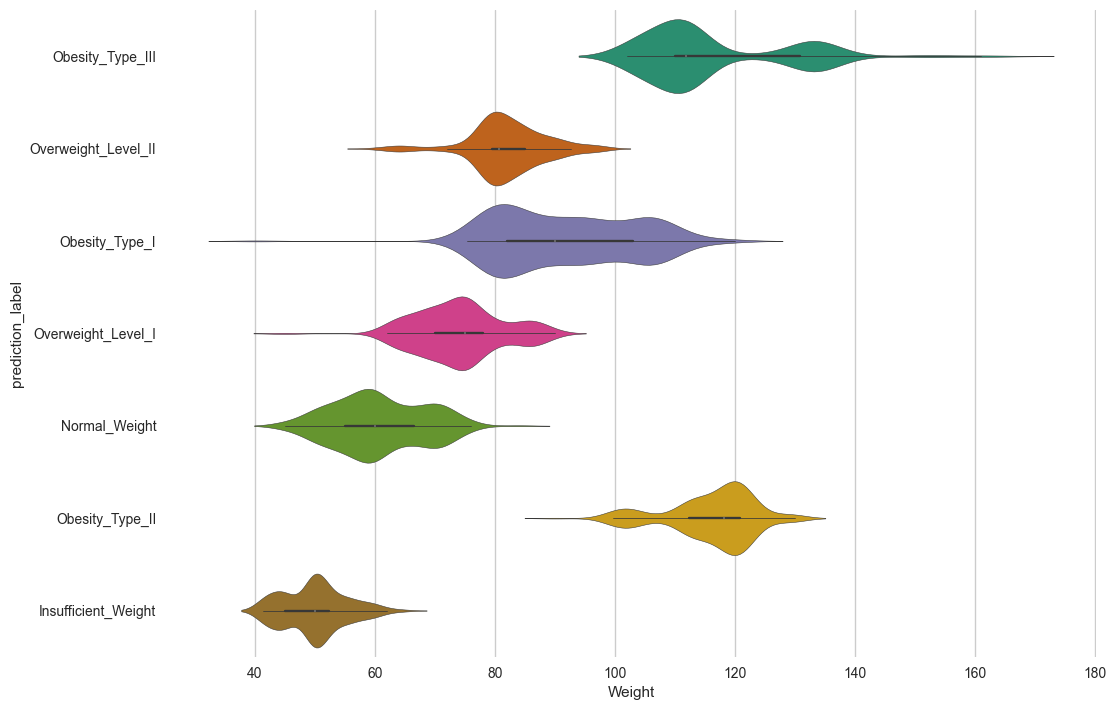

In [33]:
# @title prediction_label vs Weight

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(predictions['prediction_label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(predictions, x='Weight', y='prediction_label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [34]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x0000023ACCB70790>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(roc_auc_score, response_method=('d...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, response_method='pre...",pred,{'average': 'weighted'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, response_method='...",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, response_method='predict...",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x0000023ACCB70...,"make_scorer(cohen_kappa_score, response_method...",pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x0000023ACCB70...,"make_scorer(matthews_corrcoef, response_method...",pred,{},True,True,False


# Explanation of Metrics:
Here’s what the common metrics mean with examples:

1. Accuracy (acc):
 * Measures the proportion of correct predictions.
 * Example: If 90 out of 100 predictions are correct, accuracy = 90%.

2. AUC (auc):
 * Stands for "Area Under the Curve" of the ROC (Receiver Operating Characteristic) curve. It evaluates how well the model separates classes.
 * Example: An AUC of 0.9 means the model is 90% good at distinguishing between positive and negative classes.

3. Recall (recall):
 * Measures how many of the actual positives are correctly predicted.
 * Example: If there are 100 actual positives and the model predicts 80 of them correctly, recall = 80%.

4. Precision (precision):
 * Measures how many of the predicted positives are actual positives.
 * Example: If the model predicts 50 positives and 40 are correct, precision = 80%.

5. F1 Score (f1):
 * The harmonic mean of precision and recall, balancing both.
 * Example: Useful when you need a balance between precision and recall.

6. Kappa (kappa):
 * Measures the agreement between predicted and true labels, considering the chance of random agreement.
 * Example: If predictions match actual labels much better than random guessing, kappa will be high.

7. MCC (mcc):
 * Stands for Matthews Correlation Coefficient, a balanced metric for binary classification.
 * Example: Useful when the classes are imbalanced, providing a score between -1 (worst) to +1 (perfect).



## Data **Visualization**

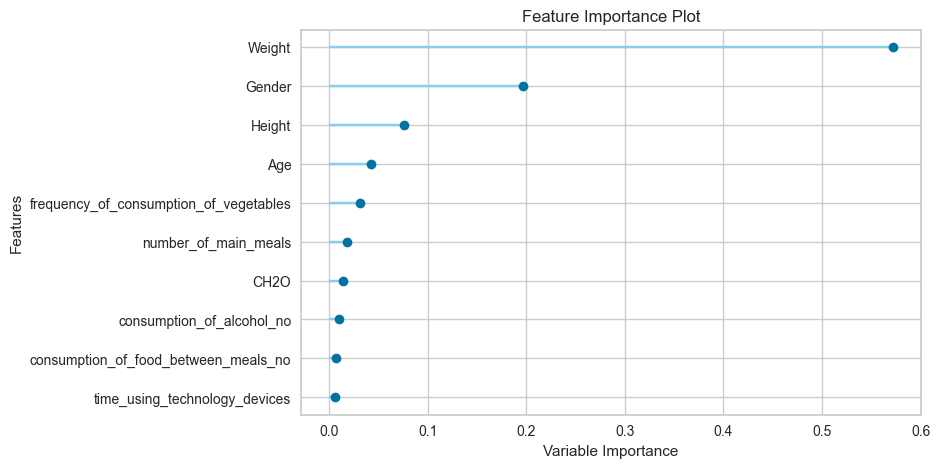

In [35]:
# Plot the feature importance of the finalized model using PyCaret
# Arguments:
# - finalized_model: The model that has been finalized using the finalize_model function
# - plot='feature': Specifies that the type of plot to be created is a feature importance plot
# The plot_model function creates various plots to analyze and evaluate the model's performance. Here, it creates a feature importance plot.
plot_model(finalized_model, plot='feature')

The command `plot_model(finalized_model, plot='feature')` in PyCaret generates a Feature Importance Plot. This plot helps you understand which features (columns in your dataset) are most influential in predicting the target variable. Here's a simple explanation:

**What is Feature Importance?**

Feature importance shows how much each feature contributes to the model's predictions.

 * Higher importance means the feature strongly affects the outcome.
 * Lower importance means the feature has little impact.

# What Happens in This Plot?
1. The finalized_model (your trained model) is analyzed.
2. PyCaret computes how much each feature affects the predictions.
3. The plot is displayed, ranking features by their importance:
 * The x-axis shows importance scores.
 * The y-axis lists the features.

# Simple Example:

Imagine a dataset to predict obesity levels with these features:

`Age`, `Weight`, `Height`, `Calories Consumed`.

After running the feature importance plot, you might see:

 * Calories Consumed (most important)
 * Weight (second most important)
 * Age (less important)
 * Height (least important)
 * This tells you that Calories Consumed and Weight have the strongest impact on obesity levels, so focusing on  them might improve your model.

In [36]:
# Use the finalized model to make predictions on the provided test DataFrame using PyCaret
# Arguments:
# - finalized_model: The model that has been finalized using the finalize_model function
# - data=test_df: The DataFrame containing the test data on which predictions are to be made
# - raw_score=True: Indicates that raw prediction scores should be included in the output DataFrame
# The predict_model function returns a DataFrame with predictions, raw scores, and performance metrics.
predictions_df = predict_model(finalized_model, data=df, raw_score=True)

# Print the shape of the DataFrame 'predictions_df'
# This provides the number of rows and columns in the DataFrame, which helps in verifying the size of the predictions data
print(predictions_df.shape)

# Display the first three rows of the 'predictions_df' DataFrame
# This gives a quick preview of the predictions and associated scores
predictions_df.head(3)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9504,0.9971,0.9504,0.9504,0.9504,0.9419,0.9419


(4999, 26)


,id,Gender,Age,Height,Weight,family_history_with_overweight,frequent_consumption_of_high_caloric_food,frequency_of_consumption_of_vegetables,number_of_main_meals,consumption_of_food_between_meals,...,transportation_used,obesity_level,prediction_label,prediction_score_Insufficient_Weight,prediction_score_Normal_Weight,prediction_score_Obesity_Type_I,prediction_score_Obesity_Type_II,prediction_score_Obesity_Type_III,prediction_score_Overweight_Level_I,prediction_score_Overweight_Level_II
0,0,Male,24.44301,1.699998,81.669952,yes,yes,2.000000,2.983297,Sometimes,...,Public_Transportation,Overweight_Level_II,Overweight_Level_II,0.0008,0.0036,0.0208,0.0011,0.0,0.0966,0.8771
1,1,Female,18.00000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,...,Automobile,Normal_Weight,Normal_Weight,0.0299,0.9528,0.0048,0.0001,0.0,0.0076,0.0048
2,2,Female,18.00000,1.711460,50.165752,yes,yes,1.880534,1.411685,Sometimes,...,Public_Transportation,Insufficient_Weight,Insufficient_Weight,0.9678,0.0110,0.0012,0.0001,0.0,0.0166,0.0033


In [43]:
predictions_df.to_csv('Obesity_data.csv',index=True,index_label='id')

In [ ]:
s = setup(df, target='obesity_level', experiment_name='obesity_prediction', session_id=42)

,Description,Value
0,Session id,42
1,Target,obesity_level
2,Target type,Multiclass
3,Target mapping,"Insufficient_Weight: 0, Normal_Weight: 1, Obesity_Type_I: 2, Obesity_Type_II: 3, Obesity_Type_III: 4, Overweight_Level_I: 5, Overweight_Level_II: 6"
4,Original data shape,"(4999, 18)"
5,Transformed data shape,"(4999, 27)"
6,Transformed train set shape,"(3499, 27)"
7,Transformed test set shape,"(1500, 27)"
8,Numeric features,9
9,Categorical features,8


In [39]:
# Compare models and select the top 3 models
top_3_models = compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8943,0.9879,0.8943,0.8962,0.8941,0.8761,0.8765,1.0390
xgboost,Extreme Gradient Boosting,0.8923,0.9881,0.8923,0.8944,0.8916,0.8737,0.8743,0.4170
gbc,Gradient Boosting Classifier,0.8908,0.0000,0.8908,0.8934,0.8906,0.8721,0.8726,2.3850
rf,Random Forest Classifier,0.8800,0.9853,0.8800,0.8821,0.8789,0.8593,0.8599,0.4090
et,Extra Trees Classifier,0.8371,0.9772,0.8371,0.8388,0.8361,0.8090,0.8096,0.2920
dt,Decision Tree Classifier,0.8351,0.9049,0.8351,0.8380,0.8353,0.8068,0.8072,0.0860
lda,Linear Discriminant Analysis,0.8174,0.0000,0.8174,0.8161,0.8151,0.7859,0.7865,0.0790
ridge,Ridge Classifier,0.6425,0.0000,0.6425,0.6375,0.6130,0.5792,0.5856,0.1100
lr,Logistic Regression,0.6368,0.0000,0.6368,0.6279,0.6201,0.5719,0.5751,0.7130
nb,Naive Bayes,0.6156,0.9137,0.6156,0.6198,0.5838,0.5491,0.5589,0.1030


In [40]:
# Step 1: Import necessary libraries
from pycaret.classification import *
import pandas as pd

# Step 2: Load Data
df = pd.read_csv('Obesity_data.csv')

# Step 3: Initialize Setup
clf1 = setup(data=df, target='obesity_level')

# Step 4: Compare Models
best_model = compare_models(include=['lr', 'knn', 'dt'],  # Only include these models: Logistic Regression (lr), K-Nearest Neighbors (knn), and Decision Tree (dt)#
                                                         # Exclude Support Vector Machines (svm)
                            fold=5,                       # Use 5-fold cross-validation
                            sort='F1',                    # Sort results by F1 score (a measure of accuracy)
                            n_select=3,                   # Select the top 3 models
                            budget_time=10)               # Spend a maximum of 10 minutes on each model


,Description,Value
0,Session id,315
1,Target,obesity_level
2,Target type,Multiclass
3,Target mapping,"Insufficient_Weight: 0, Normal_Weight: 1, Obesity_Type_I: 2, Obesity_Type_II: 3, Obesity_Type_III: 4, Overweight_Level_I: 5, Overweight_Level_II: 6"
4,Original data shape,"(4999, 18)"
5,Transformed data shape,"(4999, 27)"
6,Transformed train set shape,"(3499, 27)"
7,Transformed test set shape,"(1500, 27)"
8,Numeric features,9
9,Categorical features,8


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8279,0.9006,0.8279,0.8298,0.8281,0.7983,0.7986,0.1080
lr,Logistic Regression,0.6239,0.0000,0.6239,0.6097,0.6032,0.5563,0.5601,0.6540
knn,K Neighbors Classifier,0.4184,0.8134,0.4184,0.4179,0.4147,0.3176,0.3185,0.1280


In [ ]:

# Step 4: Compare Models
best_model = compare_models(
                            exclude=['svm'],              # Exclude Support Vector Machines (svm)
                            fold=5,                       # Use 5-fold cross-validation
                            sort='F1',                    # Sort results by F1 score (a measure of accuracy)
                            n_select=3,                   # Select the top 3 models
                            budget_time=10)               # Spend a maximum of 10 minutes on each model


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8777,0.0000,0.8777,0.8784,0.8773,0.8566,0.8569,2.9740
lightgbm,Light Gradient Boosting Machine,0.8765,0.9857,0.8765,0.8771,0.8762,0.8553,0.8555,0.9080
xgboost,Extreme Gradient Boosting,0.8725,0.9853,0.8725,0.8731,0.8720,0.8506,0.8509,0.4680
rf,Random Forest Classifier,0.8708,0.9834,0.8708,0.8720,0.8697,0.8485,0.8491,0.4160
dt,Decision Tree Classifier,0.8279,0.9006,0.8279,0.8298,0.8281,0.7983,0.7986,0.1200
et,Extra Trees Classifier,0.8177,0.9729,0.8177,0.8171,0.8159,0.7861,0.7866,0.3700
lda,Linear Discriminant Analysis,0.8065,0.0000,0.8065,0.8047,0.8039,0.7732,0.7738,0.1160
lr,Logistic Regression,0.6239,0.0000,0.6239,0.6097,0.6032,0.5563,0.5601,0.5040
ridge,Ridge Classifier,0.6293,0.0000,0.6293,0.6251,0.5997,0.5639,0.5705,0.1040
nb,Naive Bayes,0.6090,0.9122,0.6090,0.6104,0.5756,0.5414,0.5512,0.1100


In [42]:
# Step 1: Import necessary libraries
from pycaret.classification import *
import pandas as pd
import time

# Step 2: Load Data
df = pd.read_csv('Obesity_data.csv')

# Step 3: Initialize Setup
clf1 = setup(data=df, target='obesity_level')

# Step 4: Define models to compare
models_to_compare = ['lr', 'knn', 'dt']

# Step 5: Measure training time for each model
model_timings = {}

for model in models_to_compare:
    start_time = time.time()
    model_trained = create_model(model)
    end_time = time.time()
    model_timings[model] = end_time - start_time

# Step 6: Print model training times
for model, timing in model_timings.items():
    print(f"Model: {model}, Training Time: {timing:.4f} seconds")

# Optional: Identify the fastest model
fastest_model = min(model_timings, key=model_timings.get)
print(f"The fastest model is: {fastest_model} with a training time of {model_timings[fastest_model]:.4f} seconds")

# Step 7: Compare Models (based on F1 score) - same as before but for completeness
best_model = compare_models(include=models_to_compare,
                            fold=5,
                            sort='F1',
                            n_select=3,
                            budget_time=10)

print(f"Best models based on F1 score: {best_model}")


,Description,Value
0,Session id,7936
1,Target,obesity_level
2,Target type,Multiclass
3,Target mapping,"Insufficient_Weight: 0, Normal_Weight: 1, Obesity_Type_I: 2, Obesity_Type_II: 3, Obesity_Type_III: 4, Overweight_Level_I: 5, Overweight_Level_II: 6"
4,Original data shape,"(4999, 18)"
5,Transformed data shape,"(4999, 27)"
6,Transformed train set shape,"(3499, 27)"
7,Transformed test set shape,"(1500, 27)"
8,Numeric features,9
9,Categorical features,8


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6543,0.0000,0.6543,0.6442,0.6467,0.5938,0.5945
1,0.5914,0.0000,0.5914,0.5782,0.5614,0.5168,0.5245
2,0.6543,0.0000,0.6543,0.6359,0.6411,0.5937,0.5950
3,0.6629,0.0000,0.6629,0.6491,0.6488,0.6037,0.6056
4,0.6200,0.0000,0.6200,0.6012,0.6056,0.5530,0.5546
5,0.5486,0.0000,0.5486,0.5469,0.5404,0.4694,0.4717
6,0.6257,0.0000,0.6257,0.6124,0.6132,0.5592,0.5612
7,0.6429,0.0000,0.6429,0.6245,0.6218,0.5790,0.5827
8,0.6857,0.0000,0.6857,0.6665,0.6719,0.6304,0.6318


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4600,0.8357,0.4600,0.4566,0.4559,0.3664,0.3670
1,0.4086,0.8109,0.4086,0.4035,0.4036,0.3067,0.3074
2,0.4229,0.8202,0.4229,0.4306,0.4201,0.3221,0.3238
3,0.4171,0.8239,0.4171,0.4175,0.4139,0.3156,0.3164
4,0.4343,0.8164,0.4343,0.4295,0.4298,0.3356,0.3362
5,0.4000,0.8122,0.4000,0.4017,0.3980,0.2980,0.2988
6,0.3886,0.8004,0.3886,0.3864,0.3823,0.2823,0.2838
7,0.4514,0.8295,0.4514,0.4384,0.4406,0.3573,0.3584
8,0.4600,0.8419,0.4600,0.4534,0.4528,0.3658,0.3668


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8400,0.9072,0.8400,0.8427,0.8358,0.8122,0.8136
1,0.8143,0.8924,0.8143,0.8149,0.8142,0.7823,0.7824
2,0.8457,0.9109,0.8457,0.8472,0.8458,0.8192,0.8194
3,0.8171,0.8946,0.8171,0.8197,0.8163,0.7859,0.7866
4,0.8200,0.8962,0.8200,0.8228,0.8204,0.7889,0.7893
5,0.8371,0.9061,0.8371,0.8392,0.8376,0.8092,0.8094
6,0.8086,0.8895,0.8086,0.8120,0.8099,0.7757,0.7758
7,0.8514,0.9141,0.8514,0.8500,0.8504,0.8258,0.8259
8,0.8257,0.8997,0.8257,0.8300,0.8274,0.7958,0.7960


Model: lr, Training Time: 6.5334 seconds
Model: knn, Training Time: 1.4143 seconds
Model: dt, Training Time: 1.5123 seconds
The fastest model is: knn with a training time of 1.4143 seconds


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8262,0.8997,0.8262,0.8272,0.8258,0.7963,0.7966,0.1360
lr,Logistic Regression,0.6373,0.0000,0.6373,0.6237,0.6223,0.5729,0.5756,0.4780
knn,K Neighbors Classifier,0.4215,0.8156,0.4215,0.4189,0.4172,0.3214,0.3222,0.1380


Best models based on F1 score: [DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=7936, splitter='best'), LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7936, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')]
